In [36]:
import pandas as pd

In [37]:
main_set = pd.read_csv("train.csv")
print(main_set.head(3))

   patient_id name_of_drug             use_case_for_drug  \
0      206461    Valsartan  Left Ventricular Dysfunction   
1       95260   Guanfacine                          ADHD   
2       92703       Lybrel                 Birth Control   

                                   review_by_patient  effectiveness_rating  \
0  "It has no side effect, I take it in combinati...                     9   
1  "My son is halfway through his fourth week of ...                     8   
2  "I used to take another oral contraceptive, wh...                     5   

  drug_approved_by_UIC  number_of_times_prescribed  base_score  
0            20-May-12                          27    8.022969  
1            27-Apr-10                         192    7.858458  
2            14-Dec-09                          17    6.341969  


In [38]:
df = pd.DataFrame(main_set)

In [39]:
df.drop(df.columns[[0,5,5,2,1]],axis = 1,inplace=True)
print(df.head(3))

                                   review_by_patient  effectiveness_rating  \
0  "It has no side effect, I take it in combinati...                     9   
1  "My son is halfway through his fourth week of ...                     8   
2  "I used to take another oral contraceptive, wh...                     5   

   number_of_times_prescribed  base_score  
0                          27    8.022969  
1                         192    7.858458  
2                          17    6.341969  


In [40]:
print(df.isnull().sum())

review_by_patient             0
effectiveness_rating          0
number_of_times_prescribed    0
base_score                    0
dtype: int64


In [41]:
from textblob import TextBlob
old = df['review_by_patient']
new = []
for i in range(0,len(old)):
    blob = TextBlob(old[i])
    temp = blob.sentiment.subjectivity
    new.append(temp)
df['review_by_patient'] = new

In [42]:
print(df.head(3))

   review_by_patient  effectiveness_rating  number_of_times_prescribed  \
0           0.000000                     9                          27   
1           0.431349                     8                         192   
2           0.402155                     5                          17   

   base_score  
0    8.022969  
1    7.858458  
2    6.341969  


In [43]:
print(df.dtypes)

review_by_patient             float64
effectiveness_rating            int64
number_of_times_prescribed      int64
base_score                    float64
dtype: object


In [44]:
convert_dict = {'effectiveness_rating': float, 
                'number_of_times_prescribed': float
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 

review_by_patient             float64
effectiveness_rating          float64
number_of_times_prescribed    float64
base_score                    float64
dtype: object


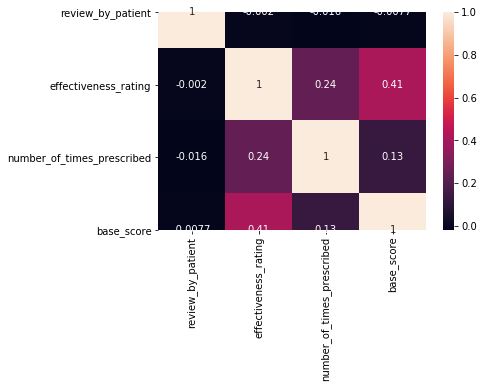

In [45]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [46]:
X = df[['review_by_patient', 'effectiveness_rating', 'number_of_times_prescribed']]
y = df['base_score']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=17)

In [48]:
from sklearn.svm import SVR
model = SVR(gamma='auto',verbose=True)
model.fit(X_train,y_train)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.010047904309781834


In [51]:
test_set = pd.read_csv("test.csv")
print(test_set.head(3))

   patient_id name_of_drug                                  review_by_patient  \
0      163740  Mirtazapine  "I&#039;ve tried a few antidepressants over th...   
1       39293     Contrave  "Contrave combines drugs that were used for al...   
2      208087      Zyclara  "4 days in on first 2 weeks.  Using on arms an...   

  drug_approved_by_UIC  number_of_times_prescribed use_case_for_drug  \
0            28-Feb-12                          22        Depression   
1             5-Mar-17                          35       Weight Loss   
2             3-Jul-14                          13         Keratosis   

   effectiveness_rating  
0                    10  
1                     9  
2                     4  


In [52]:
df_test = pd.DataFrame(test_set)

In [53]:
df_test.drop(df_test.columns[[0,5,5,3,1]],axis = 1,inplace=True)
print(df_test.head(3))

                                   review_by_patient  \
0  "I&#039;ve tried a few antidepressants over th...   
1  "Contrave combines drugs that were used for al...   
2  "4 days in on first 2 weeks.  Using on arms an...   

   number_of_times_prescribed  effectiveness_rating  
0                          22                    10  
1                          35                     9  
2                          13                     4  


In [54]:
print(df_test.isnull().sum())

review_by_patient             0
number_of_times_prescribed    0
effectiveness_rating          0
dtype: int64


In [55]:
from textblob import TextBlob
old = df_test['review_by_patient']
new = []
for i in range(0,len(old)):
    blob = TextBlob(old[i])
    temp = blob.sentiment.subjectivity
    new.append(temp)
df_test['review_by_patient'] = new

In [56]:
print(df_test.head(3))

   review_by_patient  number_of_times_prescribed  effectiveness_rating
0           0.440000                          22                    10
1           0.500000                          35                     9
2           0.688889                          13                     4


In [57]:
df_test = df_test[['review_by_patient','effectiveness_rating','number_of_times_prescribed']]

In [58]:
print(df_test.head(3))

   review_by_patient  effectiveness_rating  number_of_times_prescribed
0           0.440000                    10                          22
1           0.500000                     9                          35
2           0.688889                     4                          13


In [59]:
print(df_test.dtypes)

review_by_patient             float64
effectiveness_rating            int64
number_of_times_prescribed      int64
dtype: object


In [60]:
convert_dict = {'effectiveness_rating': float, 
                'number_of_times_prescribed': float
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 

review_by_patient             float64
effectiveness_rating          float64
number_of_times_prescribed    float64
base_score                    float64
dtype: object


In [61]:
y_pred = model.predict(df_test)

In [62]:
print(y_pred)

[8.80934375 8.80029536 6.04920577 ... 6.80099241 5.31934446 8.03961643]


In [63]:
formated_y_pred = [ '%.2f' % elem for elem in y_pred ]

In [64]:
print(formated_y_pred)

['8.81', '8.80', '6.05', '6.07', '5.16', '7.43', '8.38', '6.21', '2.13', '6.40', '4.88', '3.14', '8.39', '4.79', '6.52', '6.22', '4.64', '7.04', '7.16', '6.21', '7.12', '7.67', '7.67', '8.73', '6.38', '6.20', '7.37', '7.39', '7.92', '7.10', '6.15', '2.97', '6.45', '8.09', '7.84', '6.81', '7.70', '8.79', '8.80', '6.52', '8.32', '7.54', '6.83', '6.20', '8.64', '8.44', '8.92', '5.16', '4.95', '3.35', '3.14', '7.17', '6.13', '6.23', '7.25', '6.66', '6.66', '8.38', '8.71', '8.51', '7.65', '7.88', '6.21', '7.39', '5.38', '8.09', '6.27', '6.34', '6.11', '8.75', '6.61', '2.13', '0.97', '7.86', '3.19', '5.06', '6.35', '6.52', '6.61', '8.16', '6.61', '6.52', '6.43', '8.74', '7.61', '7.01', '8.32', '6.24', '4.82', '4.94', '8.76', '4.26', '8.63', '1.69', '6.37', '2.79', '6.19', '7.88', '6.70', '5.76', '7.56', '9.03', '4.90', '6.91', '8.78', '5.72', '4.79', '6.20', '6.15', '8.70', '7.19', '6.52', '6.20', '8.36', '7.29', '6.24', '6.35', '8.93', '5.19', '7.03', '6.29', '6.45', '5.93', '8.17', '7.24',

In [65]:
type(formated_y_pred[0])

str

In [66]:
formated_y_pred = [float(x) for x in formated_y_pred]

In [67]:
type(formated_y_pred[0])

float

In [68]:
pd.DataFrame(list(zip(test_set.patient_id,formated_y_pred)),columns=["patient_id","base_score"]).to_csv("submission.csv",index=None)